<a href="https://colab.research.google.com/github/lsaghabi/idh_brasil_for_study/blob/main/MVP_IDHM_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Minimum Viable Product
## **Disciplina: Análise de Dados e Boas Práticas**
### Aluna: Laura Orsatti Saghabi

Neste MVP, utilizei o **Ranking de IDH, em 2010, dos 5.565 municípios brasileiros como dataset**, exportado da plataforma Atlas do Desenvolvimento Humano no Brasil (http://www.atlasbrasil.org.br/ranking).

O Atlas Brasil é produto da parceria entre o Programa das Nações Unidas para o Desenvolvimento (PNUD), o Instituto de Pesquisa Econômica Aplicada (IPEA) e a Fundação João Pinheiro (FJP). Concebido com a finalidade de apresentar o Índice de Desenvolvimento Humano Municipal (IDHM), o Atlas hoje disponibiliza, além do índice, mais de 330 indicadores que percorrem temas como saúde, educação, renda e trabalho, habitação, vulnerabilidade social, meio ambiente e participação política, para os 5.570 municípios, cinco macrorregiões, 27 Unidades da Federação (UFs), 21 regiões metropolitanas (RMs), três regiões integradas de desenvolvimento (RIDEs) e aproximadamente 17.000 unidades de desenvolvimento humano (UDHs) ou “bairros”, sendo o último as menores territorialidades brasileiras que dialogam diretamente com a realidade do cidadão.

**O que é o Desenvolvimento Humano?**
É o processo de ampliação das liberdades das pessoas com relação às suas capacidades e oportunidades. Pode ser compreendido como o desenvolvimento das pessoas por meio da construção de capacidades humanas, com a participação ativa dos indivíduos no centro dos processos que possibilitam a valorização e a melhora da qualidade de suas vidas.

**IDH**
Índice de Desenvolvimento Humano (IDH) é uma medida criada para enfatizar que as pessoas e o desenvolvimento de suas capacidades devem estar no centro das decisões ao avaliar o desenvolvimento de um país.

**Três dimensões do IDH:**

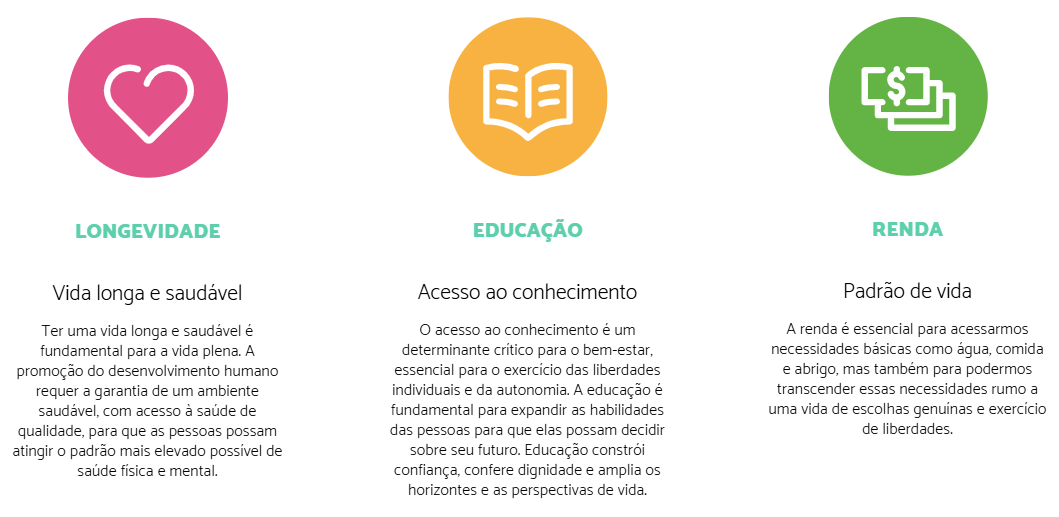

**IDHM - Índice de Desenvolvimento Humano Municipal**
O IDHM brasileiro é composto pelas mesmas três dimensões do IDH Global – longevidade, educação e renda – mas vai além: adequa a metodologia global ao contexto brasileiro e à disponibilidade de indicadores nacionais. Embora meçam os mesmos fenômenos, os indicadores levados em conta no IDHM são mais adequados para avaliar o desenvolvimento dos municípios e regiões metropolitanas brasileiras. Portanto, resultados no IDH Global não são comparáveis com o IDHM nacional.


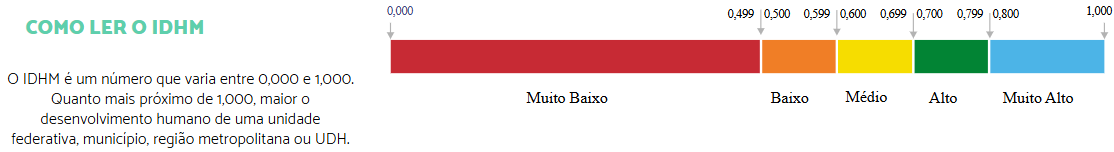


# Importando os pacotes

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Importando o dataset

O dataset foi baixado em .xls e depois trasformado em .csv para ser importado no GitHub.

In [2]:
# GitHub raw URL ou Link Público do Drive
url = 'https://raw.githubusercontent.com/lsaghabi/idh_brasil_for_study/main/idh_municipios.csv'

# csv de uma URL
idhm_br = pd.read_csv(url)

In [3]:
# verificando que idhm_br é um dataframe
type(idhm_br)

pandas.core.frame.DataFrame

# Conhecendo o dataset idhm_br

A seguir, acompanharemos uma rápida análise exploratória do dataset para conhecê-lo um pouco melhor.

## Estrutura

In [4]:
# dimensões do dataframe
idhm_br.shape

(5565, 21)

O dataframe "idhm_br" possui 5.565 linhas e 21 colunas.

In [5]:
# verificando o nome das colunas
idhm_br.columns

Index(['Territorialidade', 'Posicao IDHM', 'IDHM', 'Posicao IDHM Renda',
       'IDHM Renda', 'Posicao IDHM Educacao', 'IDHM Educacao',
       'Posicao IDHM Longevidade', 'IDHM Longevidade', 'Posicao Mulheres',
       'IDHM Mulheres', 'Posicao Homens', 'IDHM Homens', 'Posicao Negros',
       'IDHM Negros', 'Posicao Brancos', 'IDHM Brancos', 'Posicao Urbano',
       'IDHM Urbano', 'Posicao Rural', 'IDHM Rural'],
      dtype='object')

A primeira coluna é o município seguido de sua posição no ranking e seu IDHM.
A partir da quarta coluna, o banco de dados traz a posição no ranking dos IDHMs de Renda, Educação, Longevidade, Gênero (Homens e Mulheres), Raça (Negros e Brancos) e Região (Rural ou Urbana).

Segue, abaixo, a tabela explicativa dos atributos do dataframe.

In [14]:
# Convertendo para DataFrame
df_idhm_br = pd.DataFrame(idhm_br)

# Criando uma tabela explicativa das colunas
tabela_explicativa = pd.DataFrame({
    'Coluna': ['Territorialidade', 'Posicao IDHM', 'IDHM', 'Posicao IDHM Renda',
       'IDHM Renda', 'Posicao IDHM Educacao', 'IDHM Educacao',
       'Posicao IDHM Longevidade', 'IDHM Longevidade', 'Posicao Mulheres',
       'IDHM Mulheres', 'Posicao Homens', 'IDHM Homens', 'Posicao Negros',
       'IDHM Negros', 'Posicao Brancos', 'IDHM Brancos'],
    'Descrição': [
        'Nome do município',
        'Posição em que o município se encontra no ranking de IDHM',
        'Índice de Desenvolvimento Humano Municipal do município',
        'Posição em que o município se encontra no ranking de IDHM Renda',
        'Índice de Desenvolvimento Humano Municipal Renda do município',
        'Posição em que o município se encontra no ranking de IDHM Educação',
        'Índice de Desenvolvimento Humano Municipal Educação do município',
        'Posição em que o município se encontra no ranking de IDHM Longevidade',
        'Índice de Desenvolvimento Humano Municipal Longevidade do município',
        'Posição em que o município se encontra no ranking de IDHM Mulheres',
        'Índice de Desenvolvimento Humano Municipal Mulheres do município',
        'Posição em que o município se encontra no ranking de IDHM Homens',
        'Índice de Desenvolvimento Humano Municipal Homens do município',
        'Posição em que o município se encontra no ranking de IDHM Negros',
        'Índice de Desenvolvimento Humano Municipal Negros do município',
        'Posição em que o município se encontra no ranking de IDHM Brancos',
        'Índice de Desenvolvimento Humano Municipal Brancos do município'
    ]
    })

tabela_explicativa

,Coluna,Descrição
0,Territorialidade,Nome do município
1,Posicao IDHM,Posição em que o município se encontra no rank...
2,IDHM,Índice de Desenvolvimento Humano Municipal do ...
3,Posicao IDHM Renda,Posição em que o município se encontra no rank...
4,IDHM Renda,Índice de Desenvolvimento Humano Municipal Ren...
5,Posicao IDHM Educacao,Posição em que o município se encontra no rank...
6,IDHM Educacao,Índice de Desenvolvimento Humano Municipal Edu...
7,Posicao IDHM Longevidade,Posição em que o município se encontra no rank...
8,IDHM Longevidade,Índice de Desenvolvimento Humano Municipal Lon...
9,Posicao Mulheres,Posição em que o município se encontra no rank...


In [15]:
# verificando os tipos de cada coluna
idhm_br.dtypes

,0
Territorialidade,object
Posicao IDHM,int64
IDHM,float64
Posicao IDHM Renda,int64
IDHM Renda,float64
Posicao IDHM Educacao,int64
IDHM Educacao,float64
Posicao IDHM Longevidade,int64
IDHM Longevidade,float64
Posicao Mulheres,float64


O dataframe possui três tipos de dados: **object**, **int** e **float**.

A Territorialidade, que representa o nome do município, é do tipo *object* por ser um texto genérico.
Já os números que representam a posição no ranking desses municípios para IDHM, IDHM Renda, Educação e Longevidade são do tipo *int*, ou seja, inteiros.
E os números que representam os IDHMs são do tipo *float*, pois possuem casas decimais.

In [16]:
# Exibir as primeiras linhas
idhm_br.head()

,Territorialidade,Posicao IDHM,IDHM,Posicao IDHM Renda,IDHM Renda,Posicao IDHM Educacao,IDHM Educacao,Posicao IDHM Longevidade,IDHM Longevidade,Posicao Mulheres,...,Posicao Homens,IDHM Homens,Posicao Negros,IDHM Negros,Posicao Brancos,IDHM Brancos,Posicao Urbano,IDHM Urbano,Posicao Rural,IDHM Rural
0,Sao Caetano do Sul (SP),1,0.862,1,0.891,2,0.811,19,0.887,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aguas de Sao Pedro (SP),2,0.854,12,0.849,1,0.825,11,0.890,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Florianopolis (SC),3,0.847,5,0.870,5,0.800,147,0.873,20.0,...,1.0,0.873,27.0,0.768,5.0,0.882,NaN,NaN,NaN,NaN
3,BalneArio Camboriu (SC),4,0.845,10,0.854,6,0.789,1,0.894,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vitoria (ES),4,0.845,3,0.876,4,0.805,551,0.855,19.0,...,5.0,0.822,24.0,0.790,1.0,0.904,NaN,NaN,NaN,NaN


In [17]:
# Exibir as últimas linhas
idhm_br.tail()

,Territorialidade,Posicao IDHM,IDHM,Posicao IDHM Renda,IDHM Renda,Posicao IDHM Educacao,IDHM Educacao,Posicao IDHM Longevidade,IDHM Longevidade,Posicao Mulheres,...,Posicao Homens,IDHM Homens,Posicao Negros,IDHM Negros,Posicao Brancos,IDHM Brancos,Posicao Urbano,IDHM Urbano,Posicao Rural,IDHM Rural
5560,Chaves (PA),5560,0.453,5284,0.516,5564,0.234,4168,0.769,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5561,MarajA do Sena (MA),5562,0.452,5565,0.400,5554,0.299,3987,0.774,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5562,Atalaia do Norte (AM),5563,0.450,5506,0.481,5563,0.259,5094,0.733,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5563,Fernando Falcao (MA),5564,0.443,5563,0.417,5556,0.286,5175,0.728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5564,Melgaco (PA),5565,0.418,5548,0.454,5565,0.207,3897,0.776,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observamos que há linhas com valores faltantes, que confirmaremos a seguir.

In [18]:
idhm_br.count()

,0
Territorialidade,5565
Posicao IDHM,5565
IDHM,5565
Posicao IDHM Renda,5565
IDHM Renda,5565
Posicao IDHM Educacao,5565
IDHM Educacao,5565
Posicao IDHM Longevidade,5565
IDHM Longevidade,5565
Posicao Mulheres,111


5.565 municípios possuem registro de IDHM para Renda, Educação e Longevidade, ou seja, para as três dimensões do IDHM.
Por outro lado, apenas 111 municípios possuem registro de suas posições para Gênero e Raça, e nenhum município possui registro de IDHM Urbano e Rural.

# Pré-processamento

## Excluindo colunas

Como observamos anteriormente, existem colunas que não possuem valores, portanto não precisamos mantê-las no nosso dataframe.

In [19]:
# removendo as colunas 'Posicao Urbano', 'IDHM Urbano', 'Posicao Rural', 'IDHM Rural'
idhm_br.drop(['Posicao Urbano', 'IDHM Urbano', 'Posicao Rural', 'IDHM Rural'], axis=1, inplace= True)

In [20]:
# verificar nova estrutura sem as colunas 'Posicao Urbano', 'IDHM Urbano', 'Posicao Rural', 'IDHM Rural'
idhm_br.shape

(5565, 17)

## Tratando missings

<Axes: >

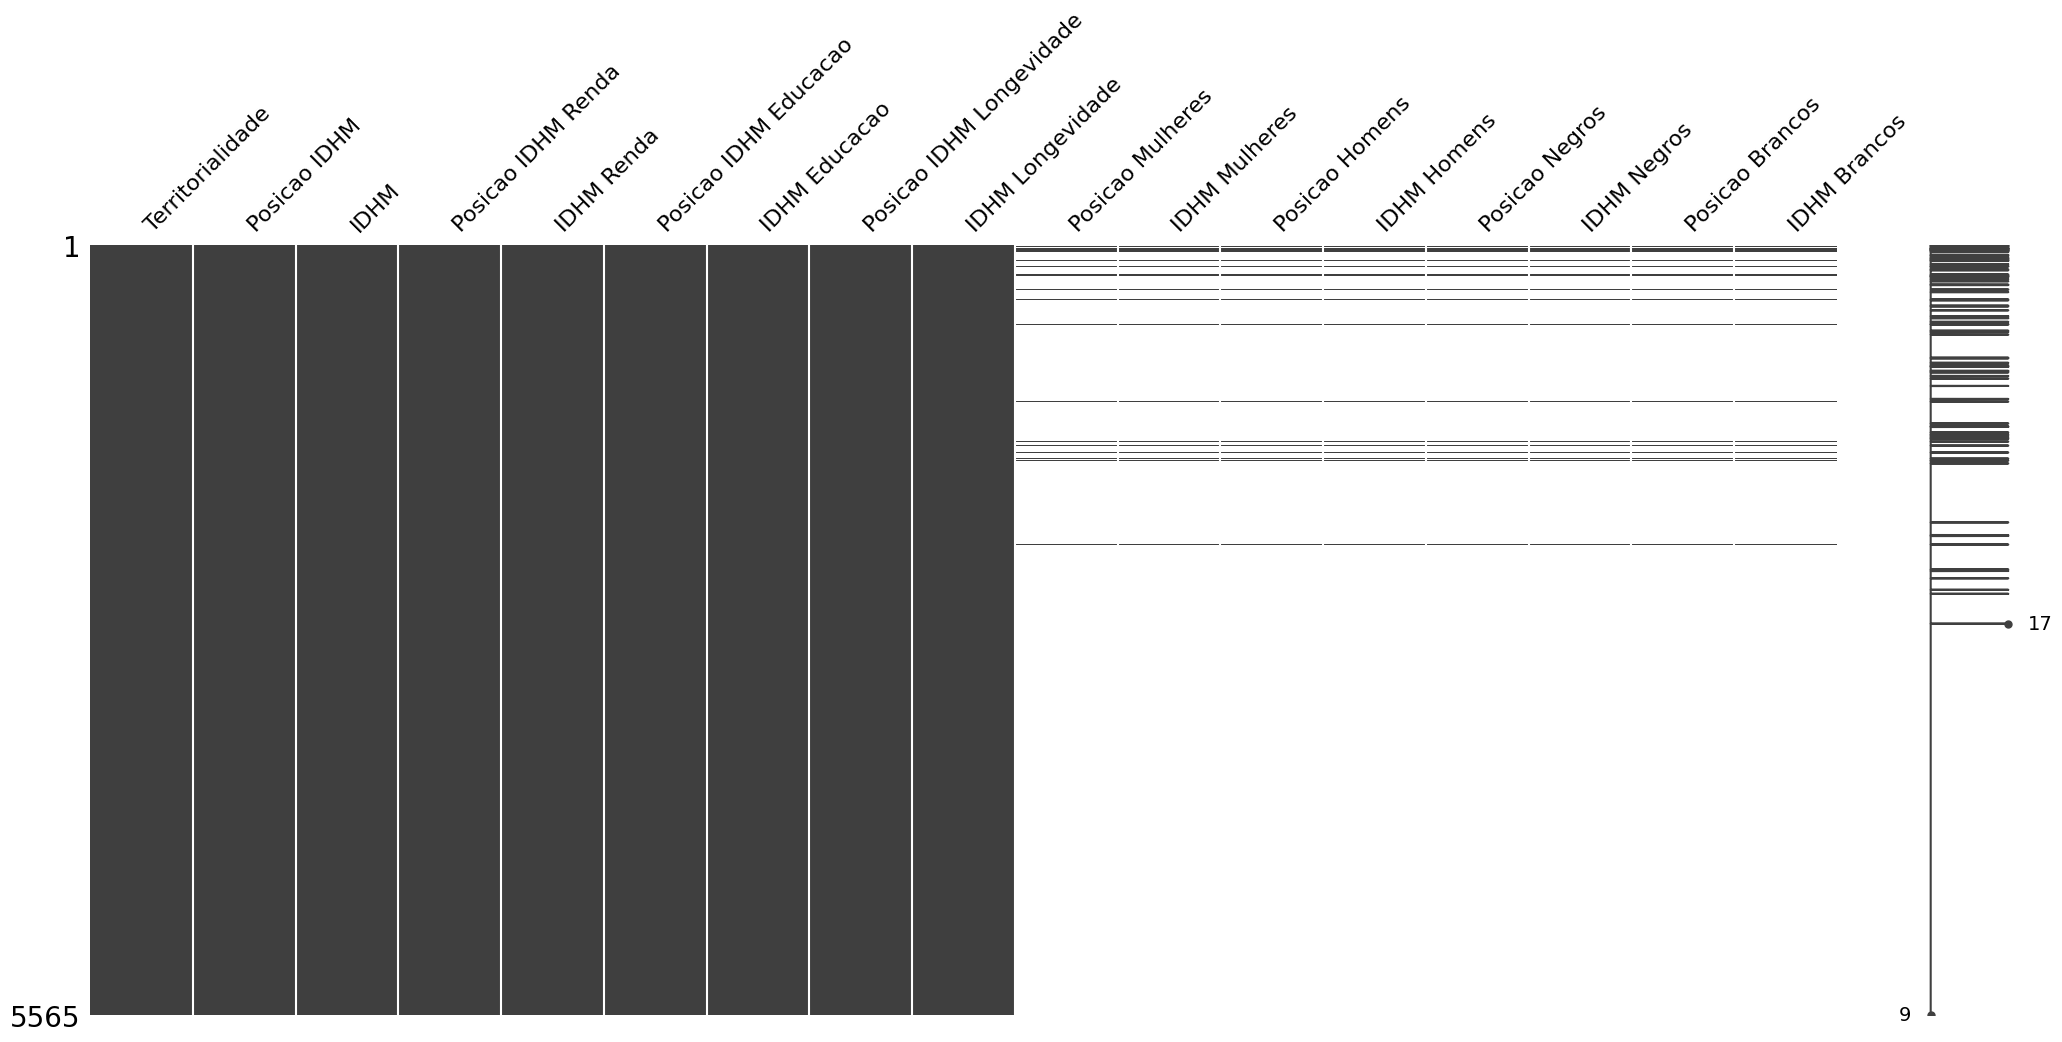

In [21]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(idhm_br.columns)

# o novo dataset irá conter todas as colunas do dataset original (após exclusão das colunas sem nenhuma informação)
idhm_brSemMissings = idhm_br[col[:]]

# substituindo os NaN por zero
idhm_brSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(idhm_brSemMissings)

In [22]:
# verificando nulls no dataset
idhm_brSemMissings.isnull().sum()

,0
Territorialidade,0
Posicao IDHM,0
IDHM,0
Posicao IDHM Renda,0
IDHM Renda,0
Posicao IDHM Educacao,0
IDHM Educacao,0
Posicao IDHM Longevidade,0
IDHM Longevidade,0
Posicao Mulheres,5454


In [23]:
# substituindo os NaN por 0
idhm_brSemMissings['Posicao Mulheres'].fillna(0, inplace=True)
idhm_brSemMissings['IDHM Mulheres'].fillna(0, inplace=True)
idhm_brSemMissings['Posicao Homens'].fillna(0, inplace=True)
idhm_brSemMissings['IDHM Homens'].fillna(0, inplace=True)
idhm_brSemMissings['Posicao Negros'].fillna(0, inplace=True)
idhm_brSemMissings['IDHM Negros'].fillna(0, inplace=True)
idhm_brSemMissings['Posicao Brancos'].fillna(0, inplace=True)
idhm_brSemMissings['IDHM Brancos'].fillna(0, inplace=True)
# idhm_brSemMissings['Posicao Urbano'].fillna(0, inplace=True)
# idhm_brSemMissings['IDHM Urbano'].fillna(0, inplace=True)
# idhm_brSemMissings['Posicao Rural'].fillna(0, inplace=True)
# idhm_brSemMissings['IDHM Rural'].fillna(0, inplace=True)

<Axes: >

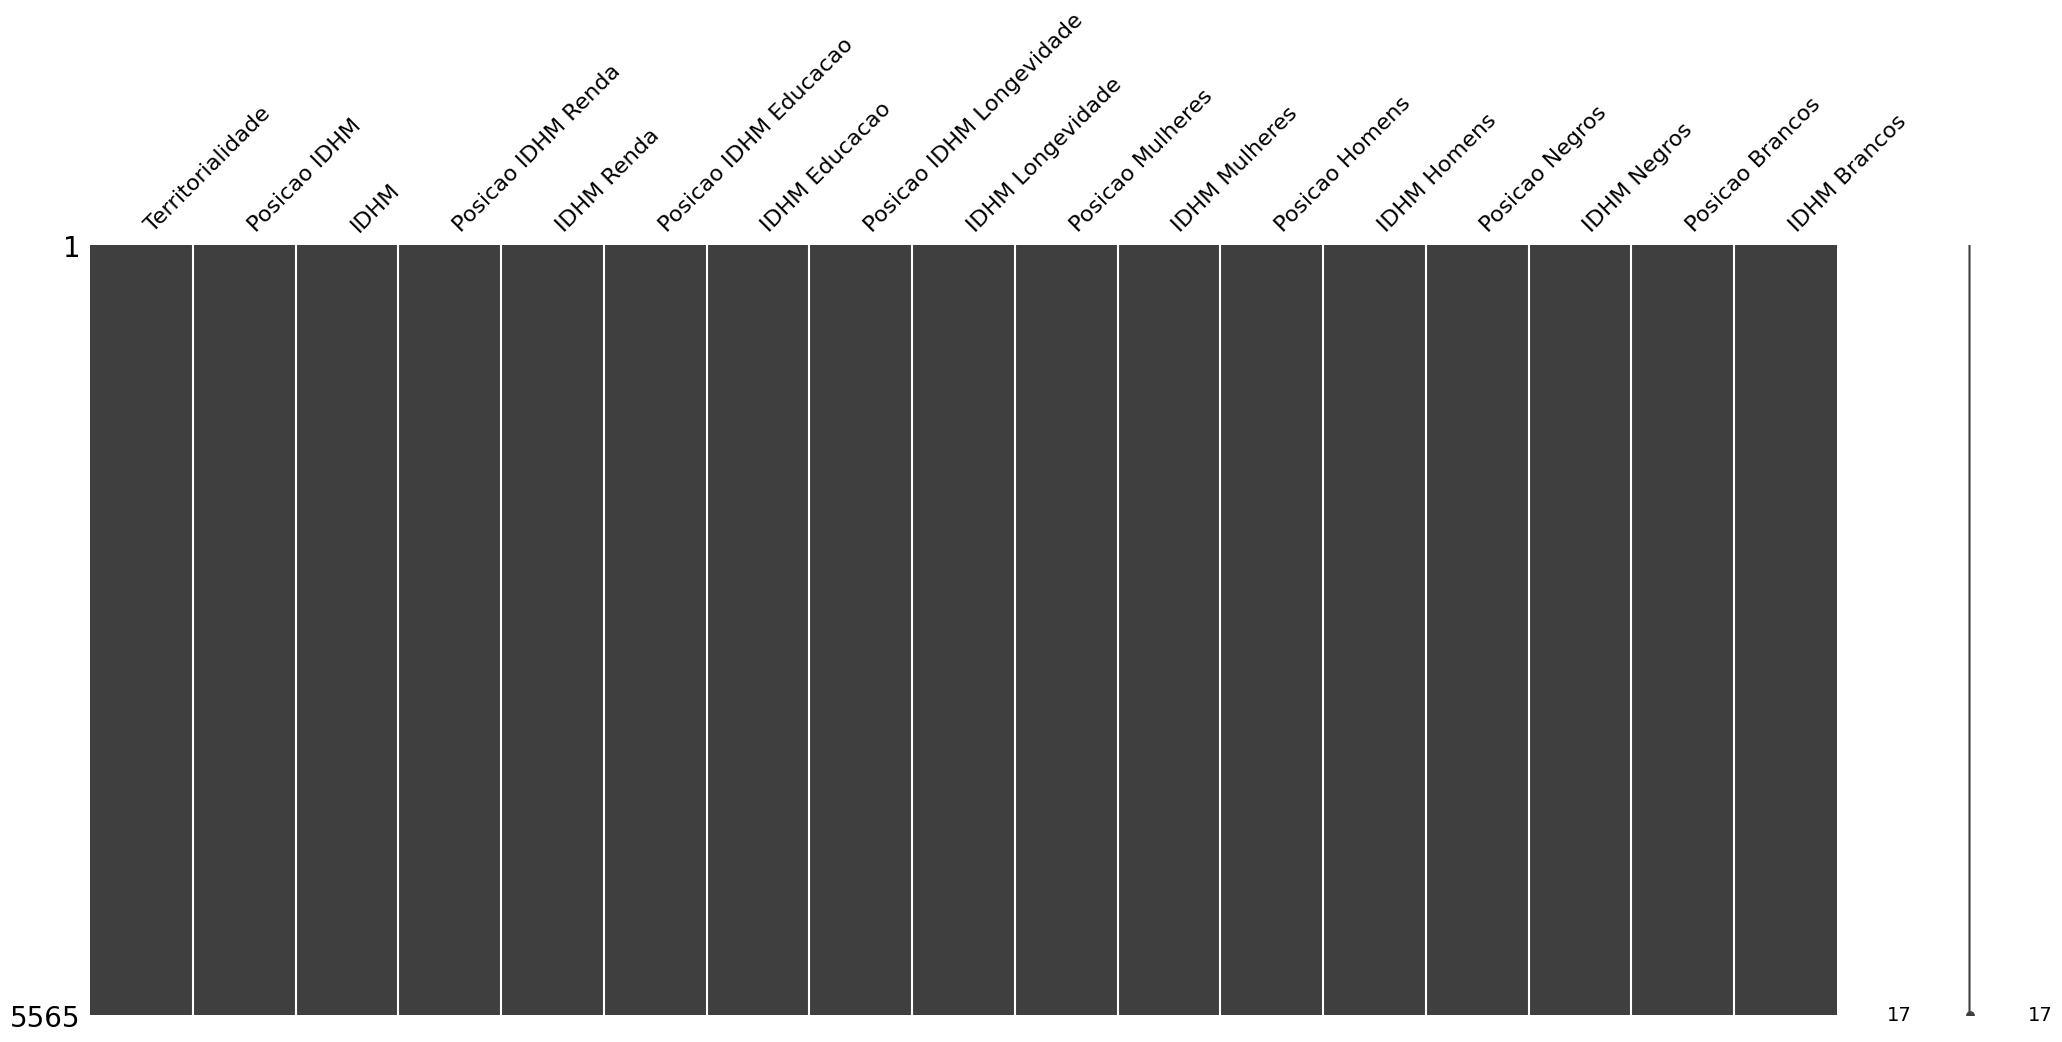

In [24]:
ms.matrix(idhm_brSemMissings)

In [25]:
idhm_brSemMissings.isnull().sum()

,0
Territorialidade,0
Posicao IDHM,0
IDHM,0
Posicao IDHM Renda,0
IDHM Renda,0
Posicao IDHM Educacao,0
IDHM Educacao,0
Posicao IDHM Longevidade,0
IDHM Longevidade,0
Posicao Mulheres,0


In [26]:
idhm_brSemMissings.head()

,Territorialidade,Posicao IDHM,IDHM,Posicao IDHM Renda,IDHM Renda,Posicao IDHM Educacao,IDHM Educacao,Posicao IDHM Longevidade,IDHM Longevidade,Posicao Mulheres,IDHM Mulheres,Posicao Homens,IDHM Homens,Posicao Negros,IDHM Negros,Posicao Brancos,IDHM Brancos
0,Sao Caetano do Sul (SP),1,0.862,1,0.891,2,0.811,19,0.887,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000
1,Aguas de Sao Pedro (SP),2,0.854,12,0.849,1,0.825,11,0.890,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000
2,Florianopolis (SC),3,0.847,5,0.870,5,0.800,147,0.873,20.0,0.868,1.0,0.873,27.0,0.768,5.0,0.882
3,BalneArio Camboriu (SC),4,0.845,10,0.854,6,0.789,1,0.894,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000
4,Vitoria (ES),4,0.845,3,0.876,4,0.805,551,0.855,19.0,0.873,5.0,0.822,24.0,0.790,1.0,0.904


Foi utilizado um dataframe paralelo (idhm_brSemMissings) para que não haja alteração no dataframe original. Por se tratar de um índice, e para cálculos posteriores de média, não é recomendado que se use "0" no lugar de nulos.

## Convertendo tipos

Observamos, anteriormente, que algumas colunas de posição no ranking estão como *float*.

Faremos abaixo a conversão para *int*.


In [27]:
# Convertendo determinadas colunas de float para int
idhm_brSemMissings['Posicao Mulheres'] = idhm_brSemMissings[['Posicao Mulheres']].astype(int)
idhm_brSemMissings['Posicao Homens'] = idhm_brSemMissings[['Posicao Homens']].astype(int)
idhm_brSemMissings['Posicao Negros'] = idhm_brSemMissings[['Posicao Negros']].astype(int)
idhm_brSemMissings['Posicao Brancos'] = idhm_brSemMissings[['Posicao Brancos']].astype(int)

# Verificar o resultado
print(idhm_brSemMissings.dtypes)

Territorialidade             object
Posicao IDHM                  int64
IDHM                        float64
Posicao IDHM Renda            int64
IDHM Renda                  float64
Posicao IDHM Educacao         int64
IDHM Educacao               float64
Posicao IDHM Longevidade      int64
IDHM Longevidade            float64
Posicao Mulheres              int64
IDHM Mulheres               float64
Posicao Homens                int64
IDHM Homens                 float64
Posicao Negros                int64
IDHM Negros                 float64
Posicao Brancos               int64
IDHM Brancos                float64
dtype: object


Foi utilizado o dataframe "idhm_brSemMissings" pois não é possível realizar a alteração para int uma vez que as colunas possuem valores nulos. Em uma melhoria posterior do MVP, seria o caso de se usar funções condicionais para a alteração, ou preencher os valores nulos pela média calculada previamente.

## Inclusão dos Estados e Regiões

A inclusão de algumas informações são necessárias para realizarmos uma análise mais detalhada dos dados.
A seguir, incluiremos os Estados brasileiros, a respectiva região em que se encontram e, ainda, incluiremos a faixa do IDHM em que cada município se encontra.

In [29]:
# Criando a coluna 'Estado' extraindo o valor entre parênteses da coluna 'Territorialidade'
idhm_br['Estado'] = idhm_br['Territorialidade'].str.extract(r'\((.*?)\)')

# Para criar a coluna Região, foi feito o dicionário que mapeia os estados para cada região
estado_regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
    'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
    'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
    'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
    'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

# Criando uma nova coluna 'Região' mapeando os estados para suas respectivas regiões
idhm_br['Regiao'] = idhm_br['Estado'].map(estado_regiao)

## Inclusão da faixa do desenvolvimento humano

A faixa do IDH varia de 0 a 1, sendo:
Muito baixo: de 0,000 a 0,499
Baixo: de 0,500 a 0,599
Médio: de 0,600 a 0,699
Alto: de 0,700 a 0,799
Muito Alto: de 0,800 a 1,000

Observação: para este estudo, vamos incluir apenas a faixa do IDHM. Em um aprofundamento posterior, podemos incluir dos IDHMs das demais dimensões.

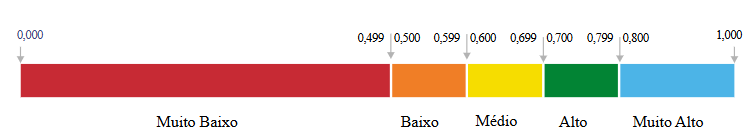

Em 2010, o IDHM do Brasil era "Médio".

In [30]:
# Função para determinar a faixa
def determinar_faixa(numero):
    if numero <= 0.499:
        return 'Muito baixo'
    elif numero <= 0.599:
        return 'Baixo'
    elif numero <= 0.699:
        return 'Médio'
    elif numero <= 0.799:
        return 'Alto'
    else:
        return 'Muito alto'

# Aplicando a função para criar a nova coluna 'Faixa'
idhm_br['Faixa'] = idhm_br['IDHM'].apply(determinar_faixa)


## Resultado e conferência das melhorias realizadas

Após incluir novas colunas no dataframe, vamos reorganizá-lo e conferir o resultado dessas inclusões.

In [31]:
# reorganizando a sequencia das colunas
idhm_br = idhm_br[['Territorialidade', 'Estado', 'Regiao', 'Posicao IDHM', 'IDHM', 'Faixa' ,'Posicao IDHM Renda', 'IDHM Renda',
                   'Posicao IDHM Educacao', 'IDHM Educacao', 'Posicao IDHM Longevidade', 'IDHM Longevidade',
                   'Posicao Mulheres', 'IDHM Mulheres', 'Posicao Homens', 'IDHM Homens', 'Posicao Negros',
                   'IDHM Negros', 'Posicao Brancos', 'IDHM Brancos']]

# Exibe as primeiras linhas do DataFrame para verificar o resultado
idhm_br.head()

,Territorialidade,Estado,Regiao,Posicao IDHM,IDHM,Faixa,Posicao IDHM Renda,IDHM Renda,Posicao IDHM Educacao,IDHM Educacao,Posicao IDHM Longevidade,IDHM Longevidade,Posicao Mulheres,IDHM Mulheres,Posicao Homens,IDHM Homens,Posicao Negros,IDHM Negros,Posicao Brancos,IDHM Brancos
0,Sao Caetano do Sul (SP),SP,Sudeste,1,0.862,Muito alto,1,0.891,2,0.811,19,0.887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aguas de Sao Pedro (SP),SP,Sudeste,2,0.854,Muito alto,12,0.849,1,0.825,11,0.890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Florianopolis (SC),SC,Sul,3,0.847,Muito alto,5,0.870,5,0.800,147,0.873,20.0,0.868,1.0,0.873,27.0,0.768,5.0,0.882
3,BalneArio Camboriu (SC),SC,Sul,4,0.845,Muito alto,10,0.854,6,0.789,1,0.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vitoria (ES),ES,Sudeste,4,0.845,Muito alto,3,0.876,4,0.805,551,0.855,19.0,0.873,5.0,0.822,24.0,0.790,1.0,0.904


In [32]:
# Conferindo se as novas colunas possuem valores nulos
contagem_nulos = idhm_br[['Estado', 'Regiao', 'Faixa']].isnull().sum()

contagem_nulos

,0
Estado,0
Regiao,0
Faixa,0


# Estatística e Análises

A seguir, algumas informações estatísticas do dataset.

## Sumário Estatístico

Iniciando com a geração do sumário estatístico.

In [33]:
# selecionar as colunas de IDHM para análise
colunas_idhm = idhm_br[['IDHM', 'IDHM Renda', 'IDHM Educacao', 'IDHM Longevidade', 'IDHM Mulheres', 'IDHM Homens', 'IDHM Negros', 'IDHM Brancos']]

# Gerar sumário estatístico das colunas selecionadas
sumario_estatistico = colunas_idhm.describe()

# exibindo um sumário estatístico
sumario_estatistico.round(3)


,IDHM,IDHM Renda,IDHM Educacao,IDHM Longevidade,IDHM Mulheres,IDHM Homens,IDHM Negros,IDHM Brancos
count,5565.000,5565.000,5565.000,5565.000,111.000,111.000,111.000,111.000
mean,0.659,0.643,0.559,0.802,0.782,0.738,0.715,0.789
std,0.072,0.081,0.093,0.045,0.084,0.058,0.081,0.062
min,0.418,0.400,0.207,0.672,0.597,0.568,0.539,0.614
25%,0.599,0.572,0.490,0.769,0.721,0.705,0.669,0.746
50%,0.665,0.654,0.560,0.808,0.772,0.744,0.713,0.798
75%,0.718,0.707,0.631,0.836,0.843,0.778,0.767,0.832
max,0.862,0.891,0.825,0.894,0.948,0.873,0.879,0.904


Não há de se analisar a estatística de rankings, portanto, as colunas de "Posição" não foram selecionadas para o sumário estatístico.

Como vimos anteriormente, a primeira posição no ranking é São Caetano do Sul (SP) e seu IDHM é 0,862. O valor "max" no sumário representa o maior valor daquela coluna.

Já o "min" é o IDHM de Melgaço (PA): 0,418.

A média do IDHM dos 5.565 municípios, em 2010 é de 0,659.
Dentre as três dimensões do IDHM, o IDHM de Longevidade é o que possui a maior média sendo o único dentro da faixa "Muito Alto".


A fim de analisar a dispersão dos dados de IDHM, calculamos, a seguir, o Coeficiente de Variação.

In [ ]:
# calculando o coeficiente de variação para analisar a variabilidade do IDHM

# médias
media_idhm = round(idhm_br['IDHM'].mean(),3)
media_idhm_renda = round(idhm_br['IDHM Renda'].mean(),3)
media_idhm_edu = round(idhm_br['IDHM Educacao'].mean(),3)
media_idhm_long = round(idhm_br['IDHM Longevidade'].mean(),3)

# desvios padrão
std_idhm = round(idhm_br['IDHM'].std(),3)
std_idhm_renda = round(idhm_br['IDHM Renda'].std(),3)
std_idhm_edu = round(idhm_br['IDHM Educacao'].std(),3)
std_idhm_long = round(idhm_br['IDHM Longevidade'].std(),3)

# fórmula do coeficiente de variação
cv_idhm = round(((std_idhm/media_idhm)*100),3)
cv_idhm_renda = round(((std_idhm_renda/media_idhm_renda)*100),3)
cv_idhm_edu = round(((std_idhm_edu/media_idhm_edu)*100),3)
cv_idhm_long = round(((std_idhm_long/media_idhm_long)*100),3)

print(f'O coeficiente de variação do IDHM é: {cv_idhm}')
print(f'O coeficiente de variação do IDHM Renda é: {cv_idhm_renda}')
print(f'O coeficiente de variação do IDHM Educacao é: {cv_idhm_edu}')
print(f'O coeficiente de variação do IDHM Longevidade é: {cv_idhm_long}')

O coeficiente de variação do IDHM é: 10.926
O coeficiente de variação do IDHM Renda é: 12.597
O coeficiente de variação do IDHM Educacao é: 16.637
O coeficiente de variação do IDHM Longevidade é: 5.611


Observamos que os dados estão pouco dispersos. A variação em relação a média do IDHM Longevidade é menor do que os demais índices.



## Estados e Regiões

In [35]:
# Calculando a média e mediana do IDHM e o número de municípios de cada estado
idhm_por_estado = idhm_br.groupby('Estado').agg(
    Media_IDHM=('IDHM', 'mean'),
    Mediana_IDHM=('IDHM', 'median'),
    Media_IDHM_Educacao=('IDHM Educacao', 'mean'),
    Media_IDHM_Renda=('IDHM Renda', 'mean'),
    Media_IDHM_Longevidade=('IDHM Longevidade', 'mean'),
    Numeros_de_Municipios=('Territorialidade', 'count'))

idhm_por_estado = idhm_por_estado.round({'Media_IDHM': 3, 'Mediana_IDHM': 3})

# Trazendo o resultado em ordem decrescente pela Média do IDHM
idhm_por_estado.sort_values(by='Media_IDHM', ascending=False)

,Media_IDHM,Mediana_IDHM,Media_IDHM_Educacao,Media_IDHM_Renda,Media_IDHM_Longevidade,Numeros_de_Municipios
Estado,,,,,,
DF,0.824,0.824,0.742000,0.863000,0.873000,1
SP,0.740,0.738,0.676336,0.716487,0.835992,645
SC,0.732,0.736,0.636522,0.728038,0.846966,293
RS,0.714,0.717,0.600714,0.722115,0.840429,496
RJ,0.709,0.712,0.620902,0.704565,0.816098,92
PR,0.702,0.706,0.611045,0.691950,0.820451,399
GO,0.695,0.697,0.596073,0.684041,0.825488,246
ES,0.692,0.684,0.591359,0.680628,0.825744,78
MT,0.684,0.686,0.576993,0.682149,0.817326,141


O valor da mediana foi incluído na tabela para se observar que há certa simetria nos dados, uma vez que o valor da mediana é muito próximo da média.

Por isso não há de se excluir outliers.

Entretanto, temos que nos atentar para a quantidade de municípios em cada estado.
O Distrito Federal, que ocupa a primeira posição no ranking do IDHM possui apenas um município: Brasília.

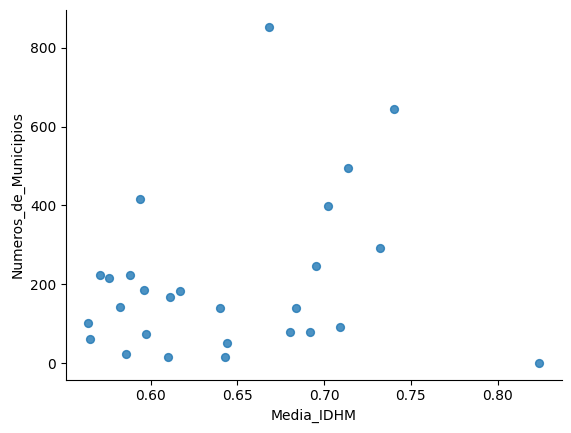

In [36]:
from matplotlib import pyplot as plt
idhm_por_estado.plot(kind='scatter', x='Media_IDHM', y='Numeros_de_Municipios', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Podemos dizer que, com relação ao número de municípios, o Distrito Federal e o Estado de Minas Gerais são outliers.

Percebemos, também, que, com exceção ao DF, os outros 4 primeiros Estados com maior IDHM estão situados nas regiões Sul e Sudeste.

A seguir, confirmaremos essa informação.

In [37]:
# Calculando a média do IDHM por região
idhm_por_regiao = round(idhm_br.groupby('Regiao')['IDHM'].mean(),3).reset_index()

# Adicionando a coluna com a Faixa do IDHM
idhm_por_regiao['Faixa'] = idhm_por_regiao['IDHM'].apply(determinar_faixa)

# Colocando em ordem decrescente de IDHM
idhm_por_regiao.sort_values(by='IDHM', ascending=False)


,Regiao,IDHM,Faixa
4,Sul,0.714,Alto
3,Sudeste,0.699,Médio
0,Centro-Oeste,0.689,Médio
2,Norte,0.608,Médio
1,Nordeste,0.591,Baixo


Adicionamos a faixa do IDHM e observamos que nenhuma região do país possui IDHM Muito Alto, em 2010.

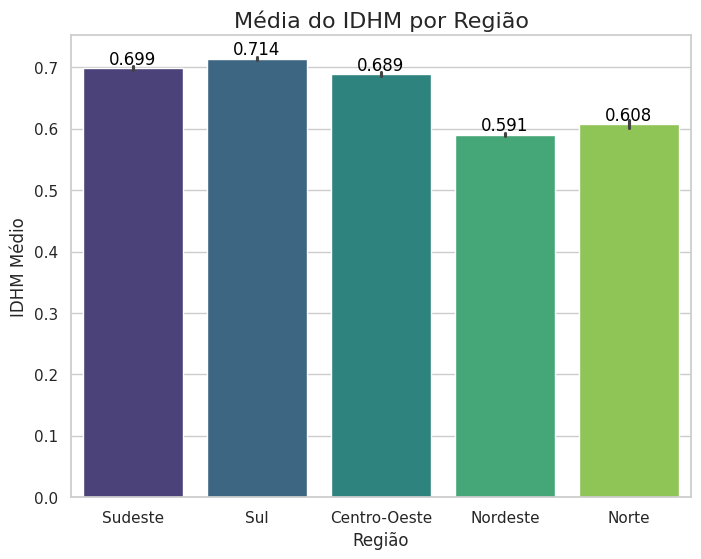

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Regiao', y='IDHM', data=idhm_br, palette='viridis')

# Adicionando rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Configurando os rótulos e título
plt.title('Média do IDHM por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('IDHM Médio', fontsize=12)

# Exibindo o gráfico
plt.show()

In [39]:
# Calculando a média do IDHM Educação por estado
media_idhm_edu = round(idhm_br.groupby('Estado')['IDHM Educacao'].mean(),3)

# Trazendo o resultado dos cinco primeiros estados em ordem decrescente
media_idhm_edu.sort_values(ascending=False).head()

,IDHM Educacao
Estado,
DF,0.742
SP,0.676
SC,0.637
RJ,0.621
PR,0.611


O Rio Grande do Sul não figura entre os cinco primeiros quando analisado o IDHM Educação. Quem entra para o grupo é o Estado do Paraná. Os demais se mantêm.

## Indicadores

Gráfico da média do IDHM de cada dimensão.

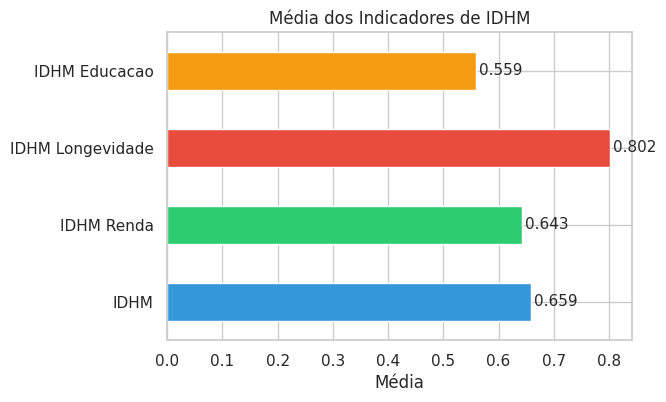

In [40]:
# Calculando a média de cada IDHM
grf_media_idhm = idhm_br[['IDHM', 'IDHM Renda', 'IDHM Longevidade', 'IDHM Educacao']].mean()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(6, 4))
grf_media_idhm.plot(kind='barh', color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])

# Adicionando título e rótulos
plt.title('Média dos Indicadores de IDHM', fontsize=12)
plt.xlabel('Média', fontsize=12)

# Exibindo o valor das médias ao lado das barras
for i, v in enumerate(grf_media_idhm):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=11)

# Exibindo o gráfico
plt.show()

# Conclusão


A média do IDHM de Educação dos municípios brasileiros é baixo, enquanto a média do IDHM de Renda e o IDHM geral é considerado médio. O único índice que configura em nível muito alto é o IDHM de Longevidade.

A longevidade, nesse contexto, reflete a expectativa de vida ao nascer e mede o progresso de um município em garantir uma vida longa e saudável para sua população.

O SUS, a redução da mortalidade infantil e saneamento básico são motivos para um índice alto.

Precisamos melhorar o índice de educação e renda.

Redução do abandono escolar, qualidade e valorização dos professores, acesso a escolas, infraestrutura podem melhorar o índice de educação.
Já o índice de renda pode crescer se o país investir em empregos formais, qualificação profssional, melhoria nas condições de trabalho, entre outras políticas.

É possível realizar muitas análises e extrair muitos insights através deste dataset. Fizemos, neste MVP, um pré-processamento e tratamento dos dados e análises estatísticas básicas.